In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load the dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

c:\Users\Frederick\anaconda3\envs\test_proyec\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [33]:
# Creating a new df for USA jobs

df_usa = df[df["job_country"] == "United States"].copy()

In [39]:
# Adding a new column for the month the job was posted

df_usa["job_posted_month"] = df_usa["job_posted_date"].dt.strftime("%B")

In [45]:
# Creating a pivot table for the number of jobs posted per month

df_usa_pivot = df_usa.pivot_table(index="job_posted_month", columns="job_title_short", aggfunc="size")

In [52]:
# Adding a new column for the month number and sorting the data by month number

df_usa_pivot["month_no"] = pd.to_datetime(df_usa_pivot["job_posted_month"], format="%B").dt.month

df_usa_pivot.sort_values("month_no", inplace=True)
df_usa_pivot.set_index("job_posted_month", inplace=True)
df_usa_pivot.drop(columns="month_no", inplace=True)

df_usa_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
job_posted_month,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,1
February,447,24,6124,3060,4956,56,1258,878,1127,90,2
March,438,19,6218,3183,4779,59,1114,829,1150,115,3
April,565,40,6049,2801,4867,51,1025,781,991,112,4
May,279,20,4993,2976,4377,49,839,746,914,90,5
June,446,32,5683,2893,4645,48,1009,812,1033,93,6
July,581,39,5201,2570,4876,65,883,747,1095,153,7
August,903,39,6634,3269,6318,68,1186,903,1515,194,8
September,897,50,4639,3224,4568,113,805,775,1014,228,9


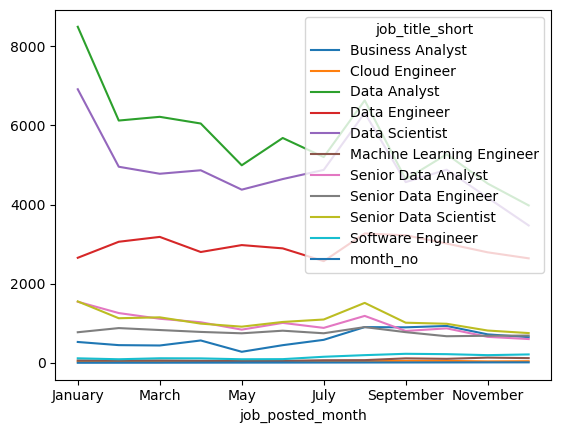

In [55]:
df_usa_pivot.plot(kind="line")

plt.show()

In [58]:
top_3 = df_usa["job_title_short"].value_counts().head(3).index.tolist()

['Data Analyst', 'Data Scientist', 'Data Engineer']

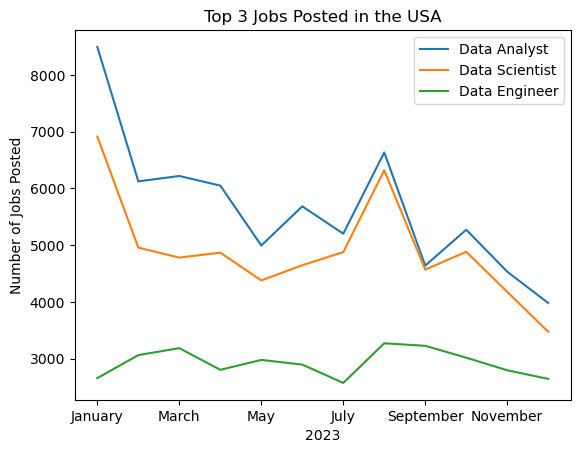

In [61]:
df_usa_pivot[top_3].plot(kind="line")

plt.title("Top 3 Jobs Posted in the USA")
plt.ylabel("Number of Jobs Posted")
plt.xlabel("2023")
plt.legend()
plt.show()